In [113]:
import pandas as pd
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
train.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [116]:
test.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [119]:
train[train['Embarked'].isnull()]

Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

In [124]:
a=train['Pclass']==1
b=train['Sex']=='female'
c=train['Age']>37
d=train['SibSp']==0
e=train['Parch']==0
f=train['Embarked']=='S'

In [139]:
train[a&b&d&e][['Embarked']].value_counts()

Embarked
C           18
S           14
dtype: int64

In [141]:
train['Embarked']=train['Embarked'].fillna('C')

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

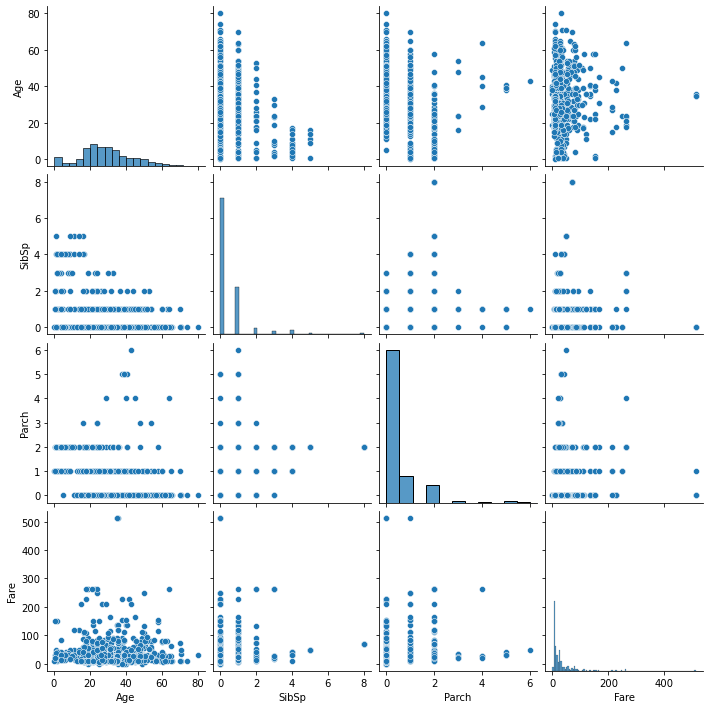

In [44]:
sns.pairplot(train.loc[:,'Age':'Fare'])
plt.show()

In [143]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
Sex_le=le1.fit_transform(train['Sex'])
train['Sex']=Sex_le

In [144]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
Embarked_le=le2.fit_transform(train['Embarked'])
train['Embarked']=Embarked_le

In [145]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
Embarked_le=le3.fit_transform(test['Embarked'])
test['Embarked']=Embarked_le

In [146]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
Embarked_le=le4.fit_transform(test['Embarked'])
test['Embarked']=Embarked_le

In [147]:
from sklearn.preprocessing import MinMaxScaler
MMS1=MinMaxScaler()
Fare_MMS=MMS1.fit_transform(train[['Fare']])
train['Fare']=Fare_MMS

In [148]:
from sklearn.preprocessing import MinMaxScaler
MMS2=MinMaxScaler()
Fare_MMS=MMS2.fit_transform(test[['Fare']])
test['Fare']=Fare_MMS

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [162]:
l=[]
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    l.append(list(set(train[i])))

In [169]:
z=zip(l,['Pclass','Sex','SibSp','Parch','Embarked'])

In [159]:
train.groupby(['Pclass','Sex','SibSp','Parch','Embarked']).mean()[['Age']]

Age
Pclass Sex SibSp Parch Embarked           
1      0   0     0     0         36.777778
                       2         32.571429
                 1     0         41.500000
                       2         30.800000
                 2     0         22.000000
...                                    ...
3      1   4     1     1          5.250000
                       2          8.000000
                 2     2          5.333333
           5     2     2          8.750000
           8     2     2               NaN

[117 rows x 1 columns]

<AxesSubplot:>

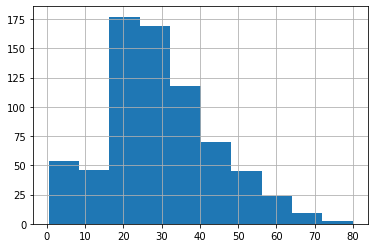

In [110]:
train['Age'].hist()

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [69]:
test.iloc[152]

Pclass         3
Sex         male
Age         60.5
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Name: 152, dtype: object

In [102]:
a=test['Pclass']==3
b=test['Sex']=='male'
c=test['Age']>37
d=test['SibSp']==0
e=test['Parch']==0
f=test['Embarked']=='S'

In [103]:
test[a&b&f&d&e&c].mean()

Pclass     3.00000
Age       44.70000
SibSp      0.00000
Parch      0.00000
Fare       9.52395
dtype: float64

In [106]:
test['Fare']=test['Fare'].fillna(10)

In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
